In [243]:
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

In [244]:
data = pd.read_csv('./Thomas/data_quarterly_DE.csv')
data['date'] = pd.PeriodIndex(data['date'], freq= 'Q').to_timestamp()
data

,iso2,date,date.1,loansPnfs_yoy,resPropPrice,cpi_yoy,fx,totalCreditPnfs2GDP,totalCreditPnfsLCY,dsrPnfs,...,totalCreditPnfs2GDP_lag2,cpi_yoy_lag3,bankCreditPnfs_lag3,totalCreditPnfsLCY_lag3,totalCreditPnfs2GDP_lag3,cpi_yoy_lag4,bankCreditPnfs_lag4,totalCreditPnfsLCY_lag4,totalCreditPnfs2GDP_lag4,fx_std
0,DE,1948-07-01,1948-08-15 01:00:37.894736896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DE,1948-10-01,1948-11-15 00:45:28.421052672,NaN,NaN,NaN,NaN,NaN,4.522,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DE,1949-01-01,1949-02-14 00:46:27.096774144,NaN,NaN,NaN,NaN,NaN,5.476,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DE,1949-04-01,1949-05-15 12:45:57.446808448,NaN,NaN,NaN,NaN,NaN,6.942,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DE,1949-07-01,1949-08-15 01:00:37.894736896,NaN,NaN,NaN,NaN,NaN,8.593,NaN,...,NaN,NaN,2.984000,4.522,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,DE,2023-04-01,2023-05-16 01:49:05.454545408,NaN,133.1571,6.796917,0.918634,125.1,5003.808,10.8,...,128.1,7.110009,2115.533000,4926.568,129.4,6.494617,2128.664667,4817.403,128.4,0.089809
300,DE,2023-07-01,2023-08-13 23:17:38.823529472,NaN,130.5617,5.832606,0.918989,123.5,5020.222,10.8,...,126.3,8.676878,2215.088333,4957.597,128.1,7.110009,2115.533000,4926.568,129.4,0.043293
301,DE,2023-10-01,2023-11-11 17:27:16.363636480,NaN,127.8992,3.648422,0.930387,122.0,5028.972,10.8,...,125.1,8.406074,2243.533667,4972.174,126.3,8.676878,2215.088333,4957.597,128.1,0.053981
302,DE,2024-01-01,2024-02-13 07:30:00.000000000,NaN,NaN,2.519272,0.921022,NaN,NaN,NaN,...,123.5,6.796917,2251.737333,5003.808,125.1,8.406074,2243.533667,4972.174,126.3,0.023914


In [245]:
dummy = pd.read_csv('dummy_final.csv')
dummy_de = dummy[dummy['iso2']=='DE']
dummy_de['date'] = pd.to_datetime(dummy_de['date.1'])
dummy_de

/var/folders/sm/mrcnp4yd4blfyd443vxlzhsc0000gn/T/ipykernel_18613/1298440593.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy_de['date'] = pd.to_datetime(dummy_de['date.1'])


,iso2,date.1,is_systemic_crisis,date
343,DE,1974-06-01,1.0,1974-06-01
344,DE,1974-07-01,1.0,1974-07-01
345,DE,1974-08-01,1.0,1974-08-01
346,DE,1974-09-01,1.0,1974-09-01
347,DE,1974-10-01,1.0,1974-10-01
...,...,...,...,...
5908,DE,2023-11-01,0.0,2023-11-01
5909,DE,2023-12-01,0.0,2023-12-01
5910,DE,2024-01-01,0.0,2024-01-01
5911,DE,2024-02-01,0.0,2024-02-01


Text(0.5, 1.0, 'Systemic crisis dummy')

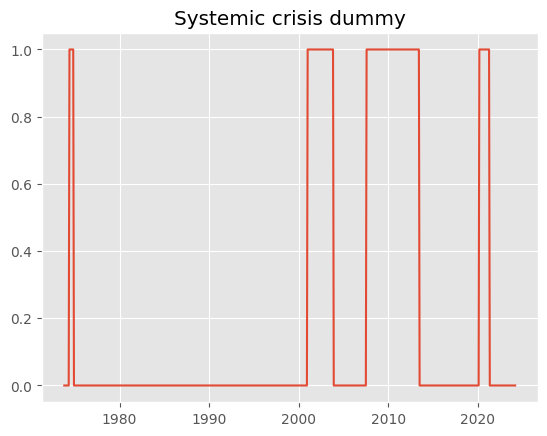

In [320]:
dummy_cc = dummy[dummy['iso2']=='DE']
dummy_cc = dummy_cc.sort_values(by='date.1')
dummy_cc.index = pd.to_datetime(dummy_cc['date.1'])
plt.plot(dummy_cc['is_systemic_crisis'])
plt.title('Systemic crisis dummy')

In [246]:
data = pd.merge(data, dummy_de, on = ['iso2', 'date'], how= 'left')
data.columns

In [248]:
data = data.drop(['iso2','date.1_x','month','date.1_y','financialStressDummy'], axis=1)
data['is_systemic_crisis'] = data['is_systemic_crisis'].fillna(0)
data = data.dropna(axis=1, how = 'all')

In [252]:
data_ea = pd.read_csv('./data/data_input_quarterly.csv')
cols2add = ['date','policyRate', 'EAtermSpread']
data_ea = data_ea[cols2add][data_ea['iso2']=='EA']
data_ea['date'] = pd.PeriodIndex(data_ea['date'], freq= 'Q').to_timestamp()
data_ea.dropna()

,date,policyRate,EAtermSpread
2161,2004-07-01,2.000000,1.496502
2162,2004-10-01,2.000000,1.436059
2163,2005-01-01,2.000000,1.200509
2164,2005-04-01,2.000000,1.190702
2165,2005-07-01,2.000000,1.034386
...,...,...,...
2236,2023-04-01,3.665816,-0.304403
2237,2023-07-01,4.186869,-0.406586
2238,2023-10-01,4.500000,-0.281729
2239,2024-01-01,4.500000,-0.344808


In [253]:
data_us = pd.read_csv('./data/data_input_quarterly.csv')
cols2add = ['date','policyRate', 'UStermSpread']
data_us = data_us[cols2add][data_us['iso2']=='US']
data_us['date'] = pd.PeriodIndex(data_us['date'], freq= 'Q').to_timestamp()
data_us.dropna()

,date,policyRate,UStermSpread
8228,1976-04-01,5.195102,0.796087
8229,1976-07-01,5.291111,1.083143
8230,1976-10-01,4.878687,1.451176
8231,1977-01-01,4.651546,1.330308
8232,1977-04-01,5.155510,1.258406
...,...,...,...
8416,2023-04-01,5.028061,-0.667538
8417,2023-07-01,5.304293,-0.767385
8418,2023-10-01,5.375000,-0.357656
8419,2024-01-01,5.375000,-0.326349


In [254]:
data.index = data['date']
data_ea.index = data_ea['date']
data_us.index = data_us['date']

In [255]:
data['policyRate'] = data['policyRate'].fillna(data_ea['policyRate'])
data['EAtermspread'] = data_ea['EAtermSpread']
data['USpolicyRate'] = data_us['policyRate']
data['UStermSpread'] = data_us['UStermSpread']

In [256]:
data.index = data['date']
data.drop('date', axis=1, inplace = True)
data.columns

In [287]:
cols2reg = ['policyRate', 'resPropPrice', 'cpi_yoy', 'fx', 'financialStressIndex', 
'bankCreditPnfs_growthRate','totalCreditPnfsLCY_growthRate', 'totalCreditPnfs2GDP_growthRate',
 'fx_std', 'is_systemic_crisis', 'EAtermspread', 'USpolicyRate', 'UStermSpread']

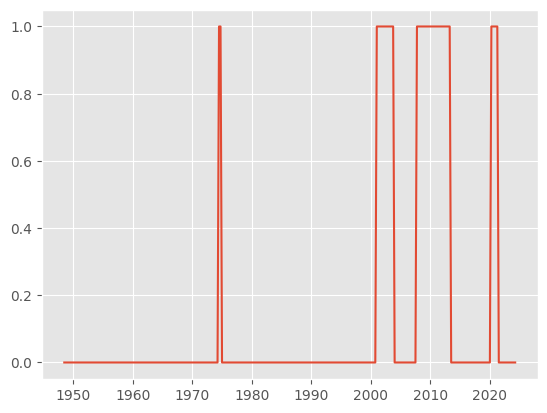

In [241]:
plt.plot(data['is_systemic_crisis'])

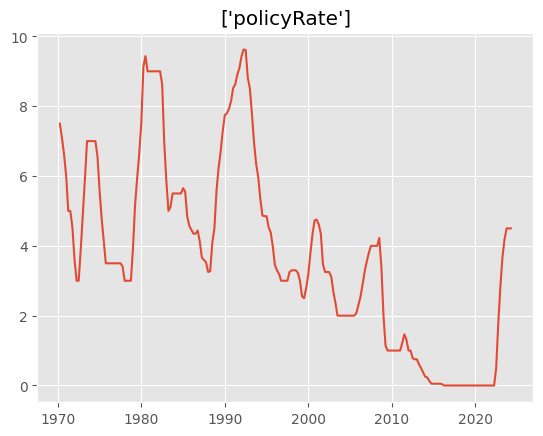

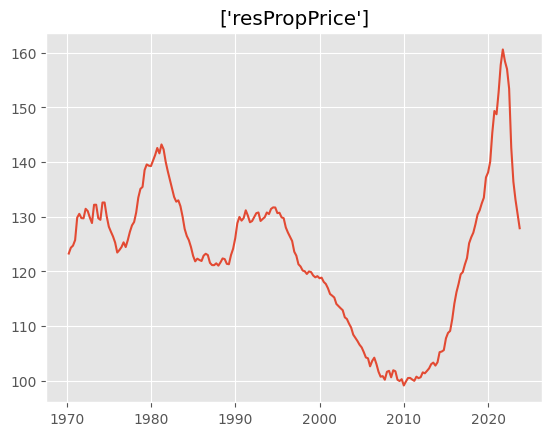

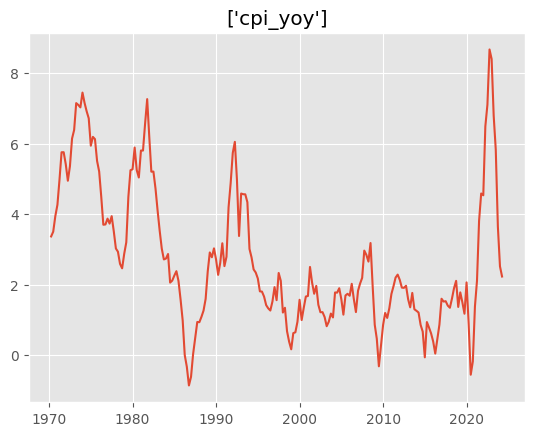

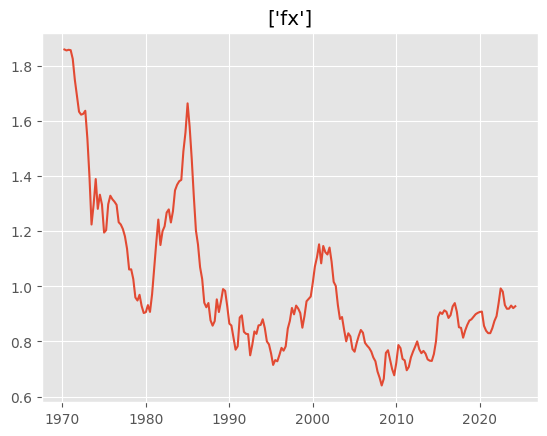

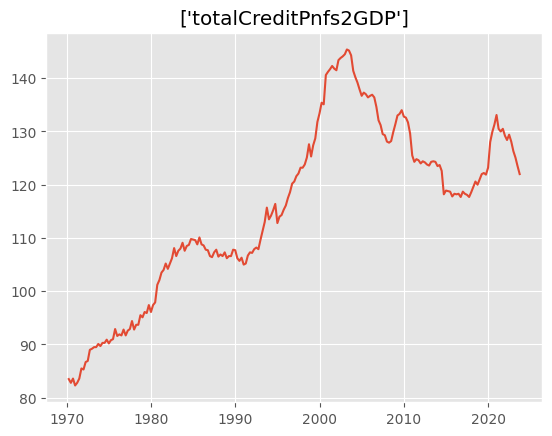

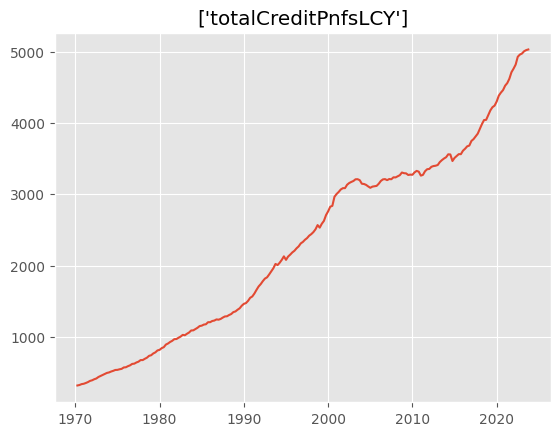

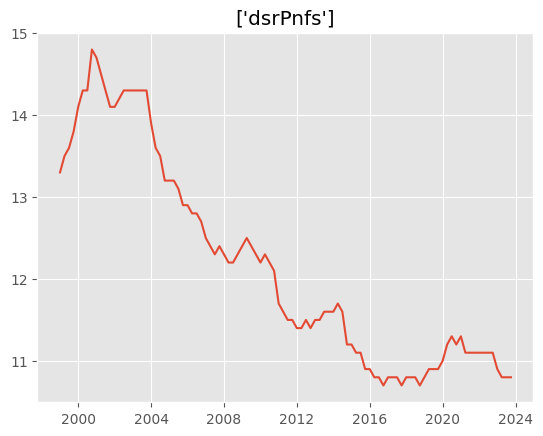

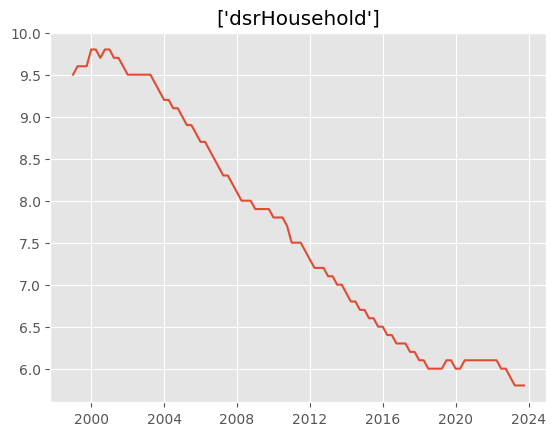

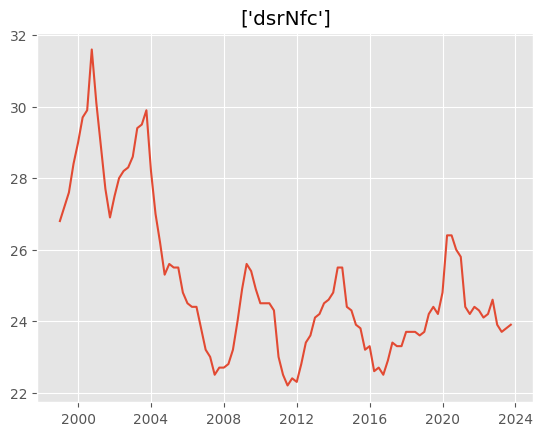

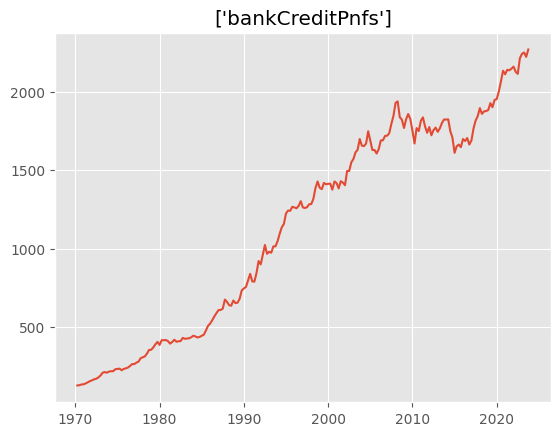

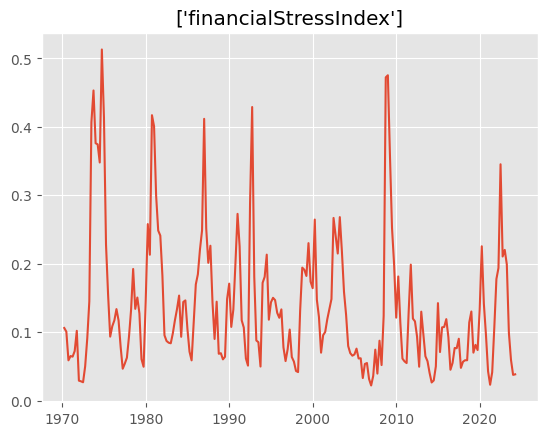

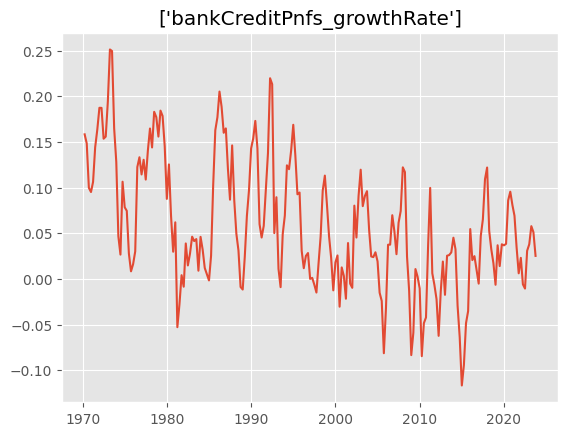

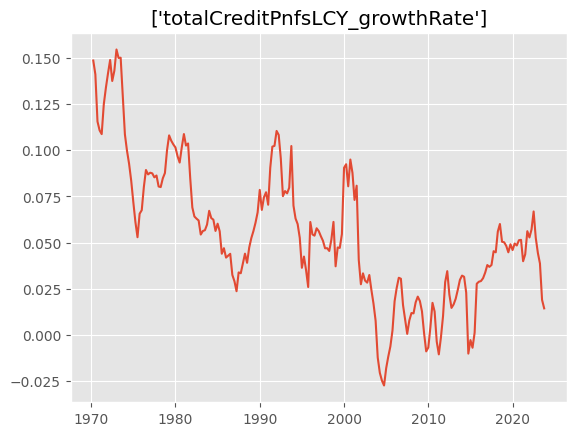

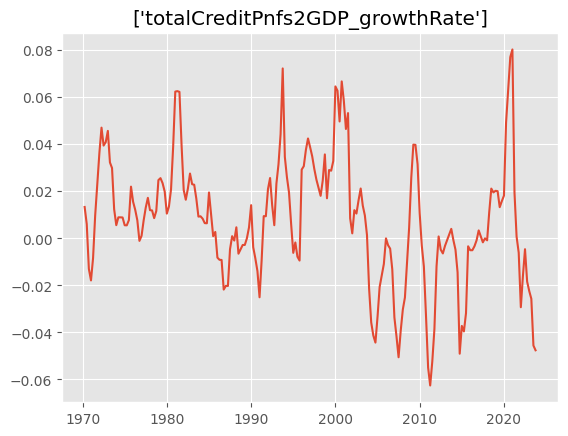

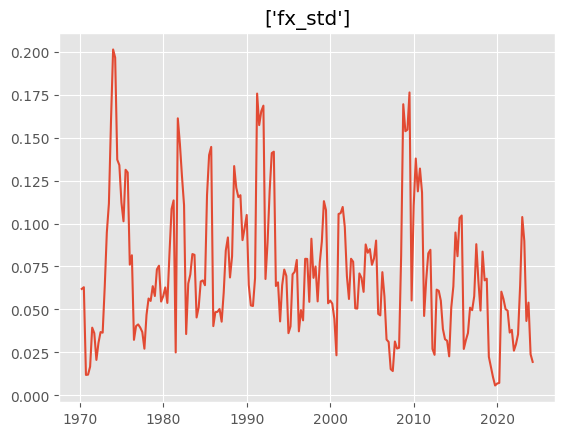

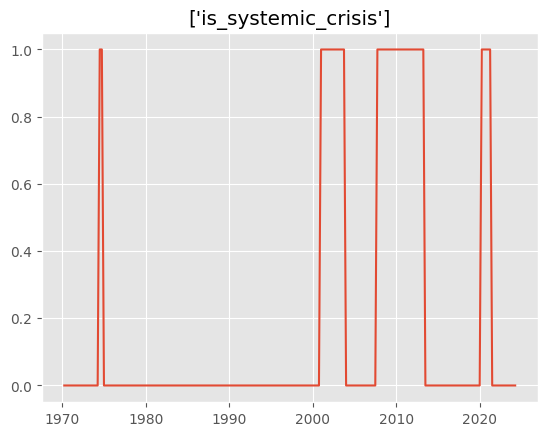

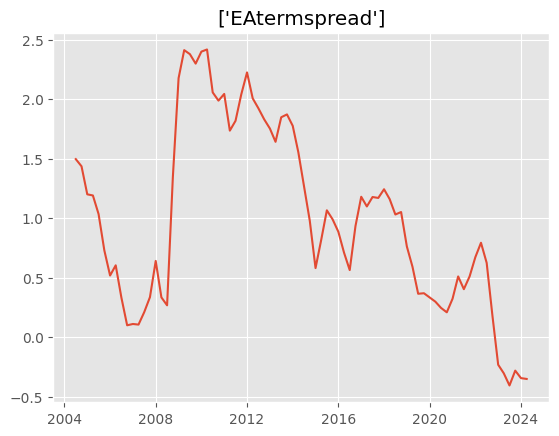

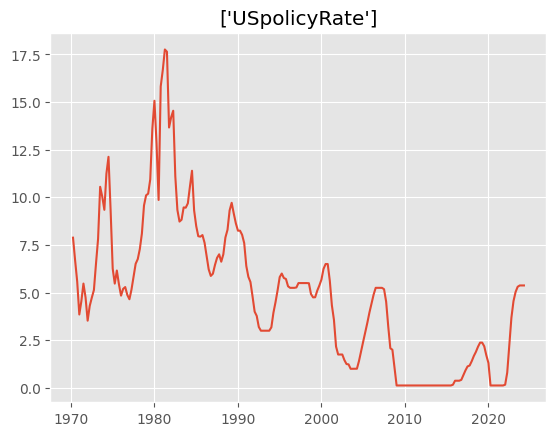

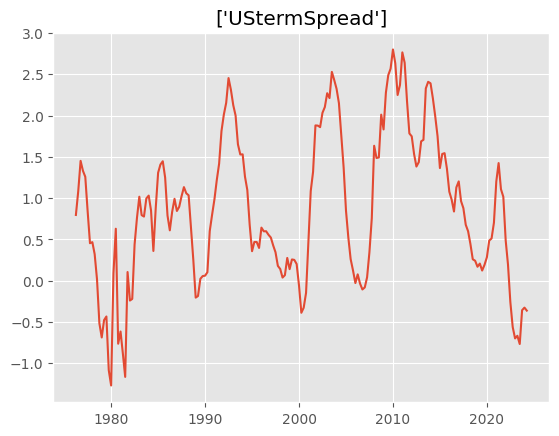

In [271]:
for col in data.loc[data[data.index>'1970'].index, ~data.columns.isin(list(data.filter(regex = 'lag').columns))]:
    plt.plot(data[col][data.index>'1970'])
    plt.title([col])
    plt.show()

In [296]:
data_reg = data[cols2reg][(data.index>'1980')&(data.index<'2005')]

In [297]:
data_reg.dropna(axis=1)

,policyRate,resPropPrice,cpi_yoy,fx,financialStressIndex,bankCreditPnfs_growthRate,totalCreditPnfsLCY_growthRate,totalCreditPnfs2GDP_growthRate,fx_std,is_systemic_crisis,USpolicyRate,UStermSpread
date,,,,,,,,,,,,
1980-04-01,9.132653,140.2524,5.892431,0.931956,0.25792,0.125377,0.096761,0.013528,0.062826,0.0,12.835408,0.089565
1980-07-01,9.434343,141.2909,5.253188,0.907237,0.21314,0.069107,0.093325,0.020855,0.053797,0.0,9.862525,0.629286
1980-10-01,9.000000,142.5771,5.040994,0.971422,0.41712,0.029838,0.101595,0.039014,0.082348,0.0,15.822525,-0.763582
1981-01-01,9.000000,141.5936,5.807466,1.066408,0.40080,0.062001,0.108743,0.062435,0.108422,0.0,16.695979,-0.615902
1981-04-01,9.000000,143.2212,5.806374,1.157865,0.29954,-0.052766,0.102540,0.062628,0.113463,0.0,17.761122,-0.881857
...,...,...,...,...,...,...,...,...,...,...,...,...
2003-10-01,2.000000,109.7389,1.177790,0.842087,0.15900,0.096110,0.007703,0.001388,0.068375,1.0,1.000000,2.431176
2004-01-01,2.000000,108.4347,1.067645,0.800404,0.12516,0.053869,-0.012248,-0.021453,0.060240,0.0,1.000000,2.323492
2004-04-01,2.000000,107.8523,1.777297,0.829684,0.07966,0.024652,-0.020509,-0.035763,0.087827,0.0,1.005102,2.150588


In [292]:
target_1 = 'is_systemic_crisis'
target_2 = 'cpi_yoy'